# **Lab-4: Regression Analysis**
### **CPS521 – Lab 4**
### **Student: Alden Shin-Culhane, Mustafa Darras, Ekrem Yilmaz**
---

## **Exercise 1: Linear Regression on Student Scores**

In [109]:
import pandas as pd
from scipy import stats

data = pd.read_csv(r"C:\Users/ihsan/CPS521_Ekrem/Dataset student_score.csv")

X = data['Xi']
Y = data['Yi']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

print(f"Regression Equation: Y = {slope:.2f}X + {intercept:.2f}")

predicted_grade = slope * 80 + intercept
print(f"Predicted Grade for Test Score 80: {predicted_grade:.2f}")

Regression Equation: Y = 0.64X + 26.78
Predicted Grade for Test Score 80: 78.29


## **Exercise 2: Plot Regression Line**

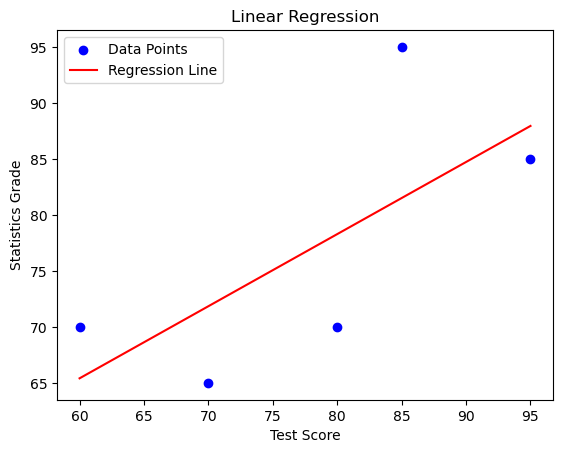

In [111]:
import matplotlib.pyplot as plt

plt.scatter(X, Y, color='blue', label='Data Points')

plt.plot(X, slope * X + intercept, color='red', label='Regression Line')

plt.xlabel('Test Score')
plt.ylabel('Statistics Grade')
plt.title('Linear Regression')
plt.legend()
plt.show()

## **Exercise 3: R-squared Value Calculation**

In [113]:
print(f"R-squared: {r_value**2:.2f}")

R-squared: 0.48


## **Exercise 4: Scatter Plot & Best Regression Type**

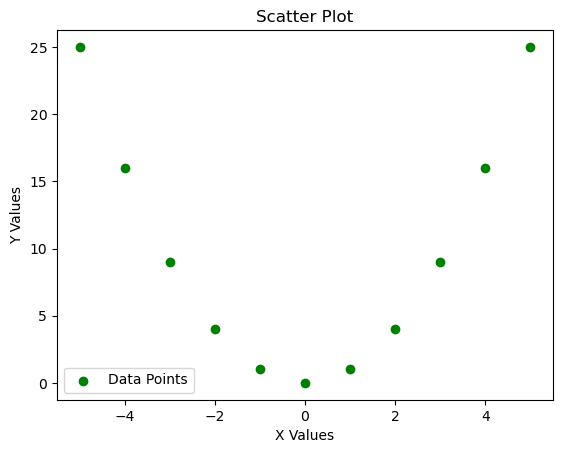

The data suggests a quadratic relationship (Y = X^2).


In [115]:
import numpy as np

X = np.array([-4, -2, 1, 3, -1, -5, 4, 2, 0, -3, 5])
Y = np.array([16, 4, 1, 9, 1, 25, 16, 4, 0, 9, 25])

plt.scatter(X, Y, color='green', label='Data Points')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot')
plt.legend()
plt.show()

print("The data suggests a quadratic relationship (Y = X^2).")

## **Exercise 5: Heart Disease Dataset Analysis

In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

zip_file_path = r"C:\\Users/ihsan/CPS521_Ekrem/heart+disease.zip"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(r"C:\\Users/ihsan/CPS521_Ekrem/heart_disease")

data_path = r"C:\\Users/ihsan/CPS521_Ekrem/processed.cleveland.data"

columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'result'
]

heart_data = pd.read_csv(data_path, header=None, names=columns)

heart_data.replace('?', np.nan, inplace=True)
heart_data = heart_data.apply(pd.to_numeric, errors='coerce')

heart_data.dropna(inplace=True)

print("Cleaned Heart Disease Dataset Preview:")
print(heart_data.head())

binary_target = (heart_data['result'] > 0).astype(int)

features = heart_data.iloc[:, :-1]  # All columns except the last one
target = binary_target  # Binary target

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

linear_model = LinearRegression()
linear_model.fit(features_train, target_train)  # Train the model
linear_predictions = linear_model.predict(features_test)  # Make predictions

linear_predictions_binary = (linear_predictions >= 0.5).astype(int)

linear_accuracy = accuracy_score(target_test, linear_predictions_binary)
linear_precision = precision_score(target_test, linear_predictions_binary)
linear_recall = recall_score(target_test, linear_predictions_binary)
linear_f1 = f1_score(target_test, linear_predictions_binary)

print("\nLinear Regression Metrics (Adapted for Binary Classification):")
print(f"Accuracy: {linear_accuracy:.2f}")
print(f"Precision: {linear_precision:.2f}")
print(f"Recall: {linear_recall:.2f}")
print(f"F1-score: {linear_f1:.2f}")

Cleaned Heart Disease Dataset Preview:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  result  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Linear Regression Metrics (Adapted for Binary Classification):
Accuracy: 0.88
Precision: 0.87
Recall: 0.83
F1-score: 0.85


## **Exercise 5: Nonlinear Model - Logistic Regression**

In [119]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(features_train, target_train)  # Train the model
logistic_predictions = logistic_model.predict(features_test)  # Make predictions

logistic_accuracy = accuracy_score(target_test, logistic_predictions)
logistic_precision = precision_score(target_test, logistic_predictions)
logistic_recall = recall_score(target_test, logistic_predictions)
logistic_f1 = f1_score(target_test, logistic_predictions)

print("\nLogistic Regression Metrics:")
print(f"Accuracy: {logistic_accuracy:.2f}")
print(f"Precision: {logistic_precision:.2f}")
print(f"Recall: {logistic_recall:.2f}")
print(f"F1-score: {logistic_f1:.2f}")

print("\nModel Comparison (Using Classification Metrics):")
print("Linear Regression:")
print(f"Accuracy: {linear_accuracy:.2f}, Precision: {linear_precision:.2f}, Recall: {linear_recall:.2f}, F1-score: {linear_f1:.2f}")
print("Logistic Regression:")
print(f"Accuracy: {logistic_accuracy:.2f}, Precision: {logistic_precision:.2f}, Recall: {logistic_recall:.2f}, F1-score: {logistic_f1:.2f}")


Logistic Regression Metrics:
Accuracy: 0.88
Precision: 0.84
Recall: 0.88
F1-score: 0.86

Model Comparison (Using Classification Metrics):
Linear Regression:
Accuracy: 0.88, Precision: 0.87, Recall: 0.83, F1-score: 0.85
Logistic Regression:
Accuracy: 0.88, Precision: 0.84, Recall: 0.88, F1-score: 0.86
